In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import learning_curve, validation_curve
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns


In [2]:
### load dataset
data = pd.read_csv("./heart_failure_clinical_records.csv")

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       2499 non-null   float64
 1   anaemia                   2499 non-null   int64  
 2   creatinine_phosphokinase  2499 non-null   int64  
 3   diabetes                  2499 non-null   int64  
 4   ejection_fraction         2499 non-null   int64  
 5   high_blood_pressure       2499 non-null   int64  
 6   platelets                 2499 non-null   float64
 7   serum_creatinine          2499 non-null   float64
 8   serum_sodium              2499 non-null   int64  
 9   sex                       2499 non-null   int64  
 10  smoking                   2499 non-null   int64  
 11  time                      2499 non-null   int64  
 12  DEATH_EVENT               2499 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 253.9 KB


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000
mean,60.123920,0.470588,589.020008,0.447779,37.746699,0.370948,264136.161961,1.355826,136.853541,0.627051,0.301321,131.451781,0.307323
std,11.684316,0.499234,999.676771,0.497365,11.323446,0.483155,100729.202953,0.963763,4.500707,0.483686,0.458923,77.745116,0.461477
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,118.000000,0.000000,30.000000,0.000000,210000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,246.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,69.000000,1.000000,582.000000,1.000000,45.000000,1.000000,314000.000000,1.300000,140.000000,1.000000,1.000000,205.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


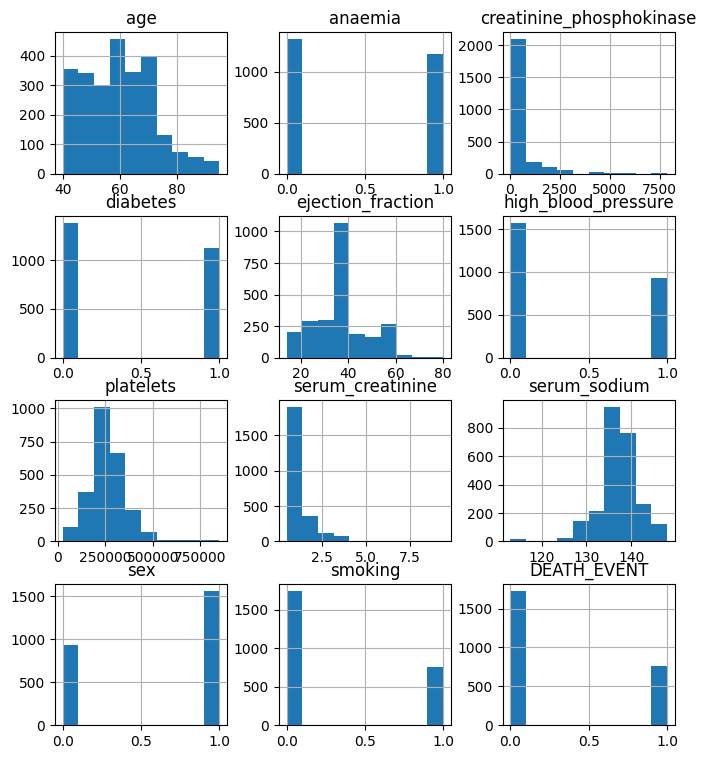

In [85]:
data.drop('time',axis=1).hist(figsize=(8,9))
plt.savefig('./plots/hist.png')

In [30]:
y = data['DEATH_EVENT']
X = data.drop(['time','DEATH_EVENT'],axis=1)

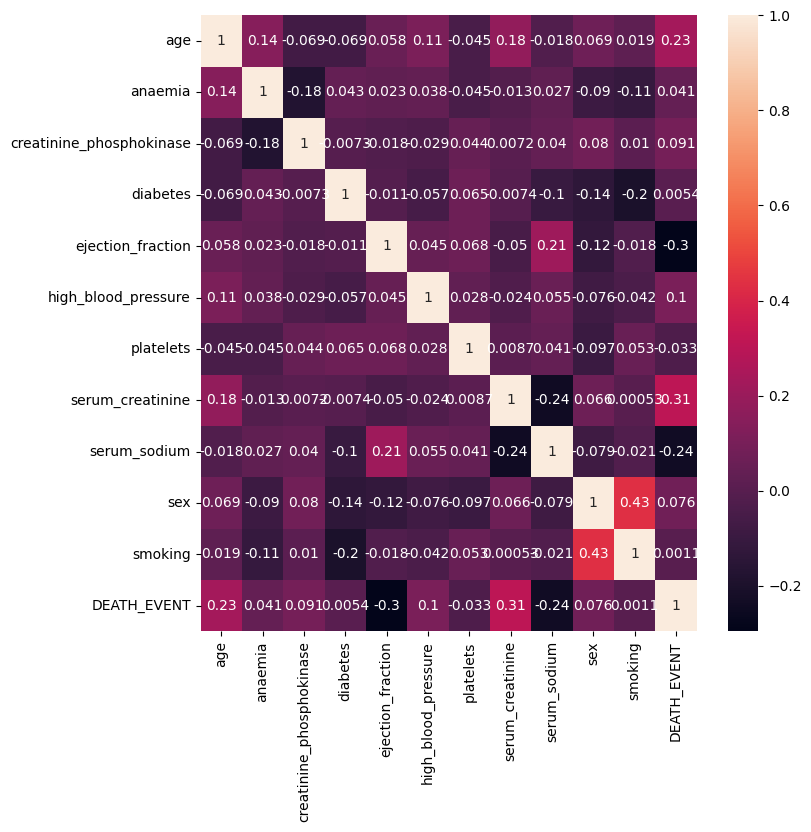

In [86]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data.drop('time',axis=1).corr(),annot= True)
plt.savefig('./plots/corr.png')

In [25]:
# Scale the data
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X_scaled = scaling.transform(X)

In [31]:
# Scale the data
X_scaled = X
to_scale = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
X_to_scale = X[to_scale].to_numpy()
scaling = StandardScaler(with_mean=True, with_std=True).fit_transform(X_to_scale)
# X_scaled = scaling.transform(X_to_scale)
X_scaled[to_scale] = scaling

In [32]:
# split training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [33]:
neural_network = MLPClassifier(hidden_layer_sizes=(250,250), activation='relu') 
neural_network.fit(X_train,y_train)
y_pred = neural_network.predict(X_test)
print(classification_report(y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       351
           1       0.91      0.90      0.90       149

    accuracy                           0.94       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.94      0.94      0.94       500



In [115]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred=y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       351
           1       0.94      0.84      0.89       149

    accuracy                           0.94       500
   macro avg       0.94      0.91      0.92       500
weighted avg       0.94      0.94      0.93       500



In [111]:
svm = SVC(kernel='poly',class_weight='balanced',degree=4)  
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred=y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       351
           1       0.84      0.82      0.83       149

    accuracy                           0.90       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.90      0.90      0.90       500



In [100]:
gbdt = GradientBoostingClassifier(n_estimators=200, max_depth=6)
gbdt.fit(X_train,y_train)
y_pred_gbdt = gbdt.predict(X_test)
print(classification_report(y_test, y_pred=y_pred_gbdt))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       351
           1       0.95      0.94      0.95       149

    accuracy                           0.97       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.97      0.97      0.97       500



In [41]:
# Fit neural_network model
neural_network = MLPClassifier(hidden_layer_sizes=(250,250), activation='relu')
train_sizes_nn, train_scores_nn, test_scores_nn, fit_times_nn, _ = learning_curve(neural_network, X_train, y_train, cv=5,return_times=True, scoring='f1')

C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Li

In [45]:
# Fit knn model
knn = KNeighborsClassifier(n_neighbors=2)
train_sizes_knn, train_scores_knn, test_scores_knn, fit_times_knn, _ = learning_curve(knn, X_train, y_train, cv=5,return_times=True, scoring='f1')

In [116]:
# Fit svm model
svm = SVC(kernel='poly',class_weight='balanced',degree=4)
train_sizes_svm, train_scores_svm, test_scores_svm, fit_times_svm, _ = learning_curve(svm, X_train, y_train, cv=5,return_times=True, scoring='f1')

In [118]:
# Fit gradient boosting DT model
gbdt = GradientBoostingClassifier(n_estimators=200, max_depth=6)
train_sizes_gbdt, train_scores_gbdt, test_scores_gbdt, fit_times_gbdt, _ = learning_curve(gbdt, X_train, y_train, cv=5,return_times=True, scoring='f1')

In [157]:
# Funtion to plot curves
def curve_plot(x, train_scores, test_scores, title, x_label,filepath=None):
    # plt.figure()
    plt.plot(x,np.mean(train_scores,axis=1), label='training')
    plt.plot(x,np.mean(test_scores,axis=1), label='validation')
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel("F1 Score")
    plt.legend()
    if filepath:
        plt.savefig(filepath)
    # plt.show()

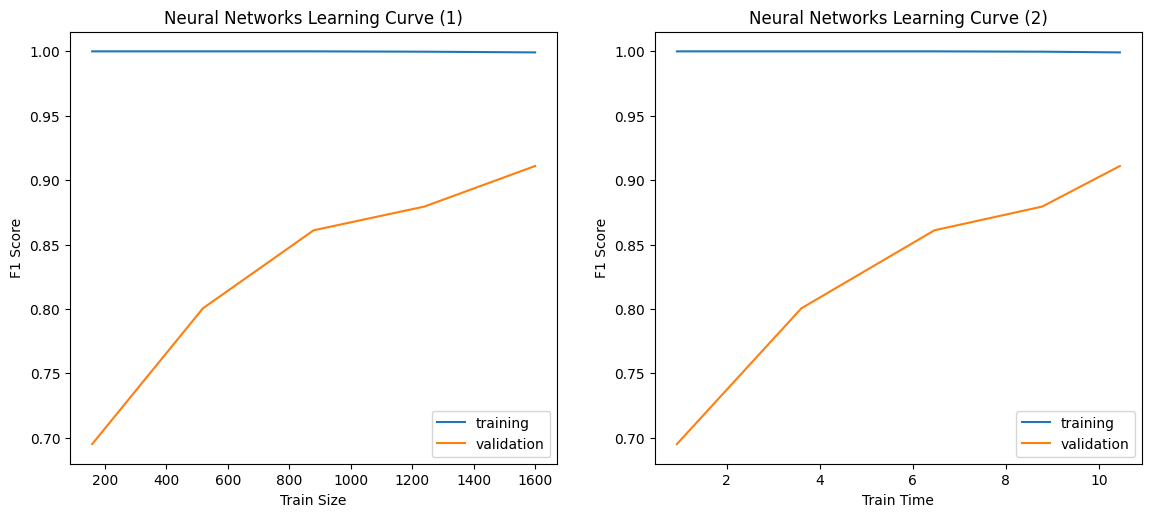

In [158]:
# Neural Network Learning Curves
# Neural Network Learning Curves
plt.figure()
# f, axs = plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
curve_plot(train_sizes_nn, train_scores_nn, test_scores_nn, "Neural Networks Learning Curve (1)", 'Train Size')
plt.subplot(1, 2, 2)
curve_plot(np.mean(fit_times_nn,axis=1), train_scores_nn, test_scores_nn, "Neural Networks Learning Curve (2)", 'Train Time')
plt.subplots_adjust(bottom=0.1, right=1.8, top=1)
plt.savefig('./plots/learning_curves_nn.png',bbox_inches='tight')


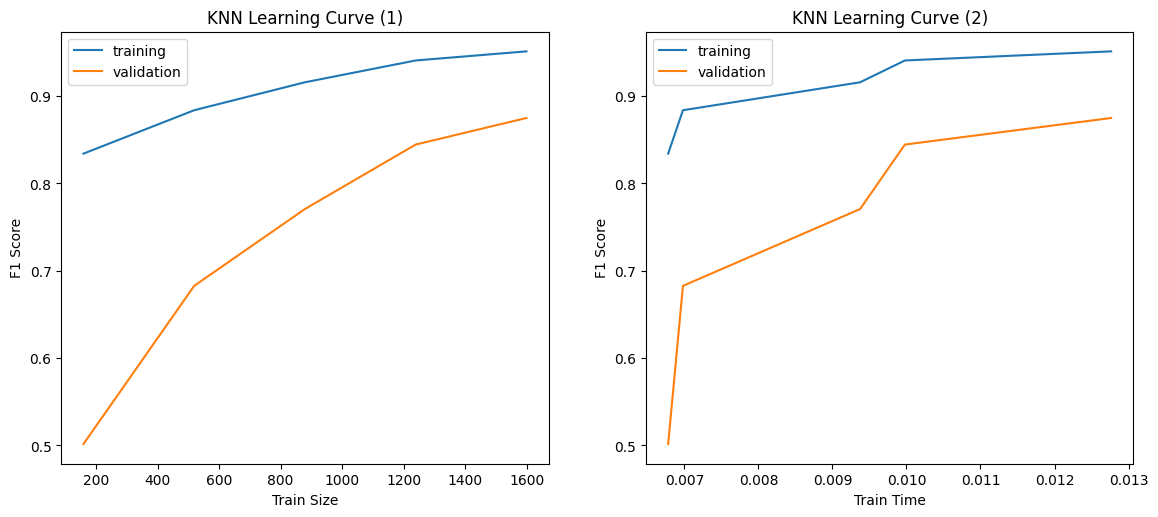

In [159]:
# KNN Learning Curves
plt.figure()
# f, axs = plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
curve_plot(train_sizes_knn, train_scores_knn, test_scores_knn, "KNN Learning Curve (1)", 'Train Size')
plt.subplot(1, 2, 2)
curve_plot(np.mean(fit_times_knn,axis=1), train_scores_knn, test_scores_knn, "KNN Learning Curve (2)", 'Train Time')
plt.subplots_adjust(bottom=0.1, right=1.8, top=1)
plt.savefig('./plots/learning_curves_knn.png',bbox_inches='tight')

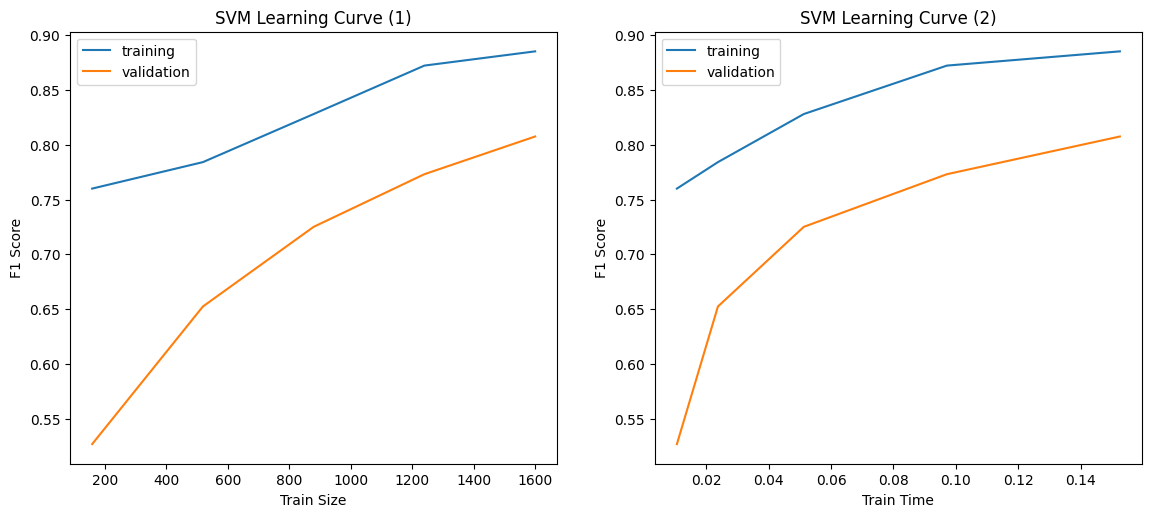

In [160]:
# SVM Learning Curves
plt.figure()
# f, axs = plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
curve_plot(train_sizes_svm, train_scores_svm, test_scores_svm, "SVM Learning Curve (1)", 'Train Size')
plt.subplot(1, 2, 2)
curve_plot(np.mean(fit_times_svm,axis=1), train_scores_svm, test_scores_svm, "SVM Learning Curve (2)", 'Train Time')
plt.subplots_adjust(bottom=0.1, right=1.8, top=1)
plt.savefig('./plots/learning_curves_svm.png',bbox_inches='tight')

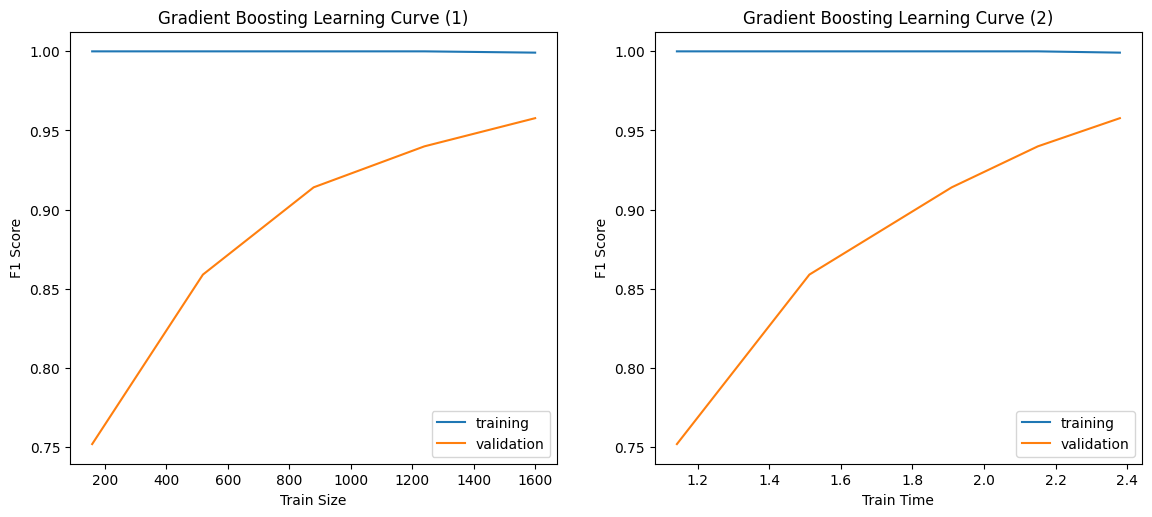

In [161]:
# Gradient Boosting Learning Curves
plt.figure()
# f, axs = plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
curve_plot(train_sizes_gbdt, train_scores_gbdt, test_scores_gbdt, "Gradient Boosting Learning Curve (1)", 'Train Size')
plt.subplot(1, 2, 2)
curve_plot(np.mean(fit_times_gbdt,axis=1), train_scores_gbdt, test_scores_gbdt, "Gradient Boosting Learning Curve (2)", 'Train Time')
plt.subplots_adjust(bottom=0.1, right=1.8, top=1)
plt.savefig('./plots/learning_curves_gb.png',bbox_inches='tight')


In [52]:
# Neural Network Hyperparameters
neural_network = MLPClassifier(activation='relu')
param_name_nn, param_range_nn = "hidden_layer_sizes", [(50,50), (100,100), (150,150), (200,200), (250,250)]
train_param_nn_scores, test_param_nn_scores = validation_curve(
    neural_network, X_train, y_train, param_name=param_name_nn, param_range=param_range_nn, cv=5, scoring='f1'
)

C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Li

In [55]:
# KNN Hyperparameters
knn = KNeighborsClassifier()
param_name_knn, param_range_knn = "n_neighbors", [1,3,5,7,9,15]
train_param_knn_scores, test_param_knn_scores = validation_curve(
    knn, X_train, y_train, param_name=param_name_knn, param_range=param_range_knn, cv=5, scoring='f1'
)

In [124]:
# SVM Hyperparameters
svm = SVC(class_weight='balanced')
param_name_svm, param_range_svm = "kernel", ['linear','poly','rbf','sigmoid']
train_param_svm_scores, test_param_svm_scores = validation_curve(
    svm, X_train, y_train, param_name=param_name_svm, param_range=param_range_svm, cv=5, scoring='f1'
)

In [125]:
# Gradient Boosting Hyperparameters
gbdt = GradientBoostingClassifier()
param_name_gbdt, param_range_gbdt = "n_estimators", [10,50,100,200,300,500]
train_param_gbdt_scores, test_param_gbdt_scores = validation_curve(
    gbdt, X_train, y_train, param_name=param_name_gbdt, param_range=param_range_gbdt, cv=5, scoring='f1'
)

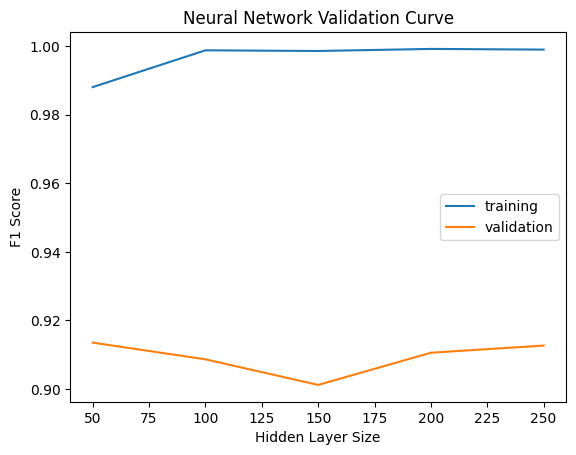

In [93]:
# NN Validation Curve
param_x = [i[0] for i in param_range_nn]
curve_plot(param_x, train_param_nn_scores, test_param_nn_scores, "Neural Network Validation Curve", 'Hidden Layer Size', './plots/validation_curve_nn.png')

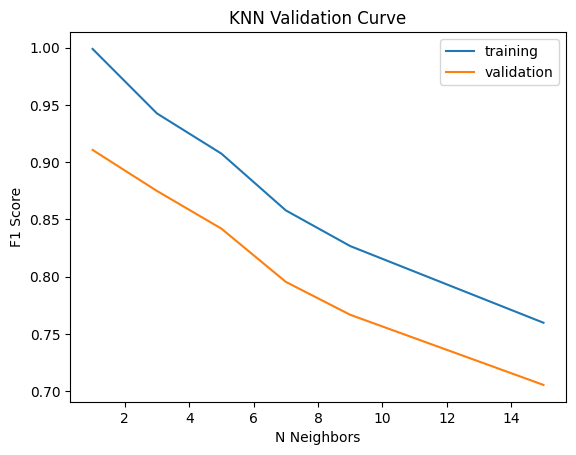

In [126]:
# KNN Validation Curve
curve_plot(param_range_knn, train_param_knn_scores, test_param_knn_scores, "KNN Validation Curve", 'N Neighbors','./plots/validation_curve_knn.png')

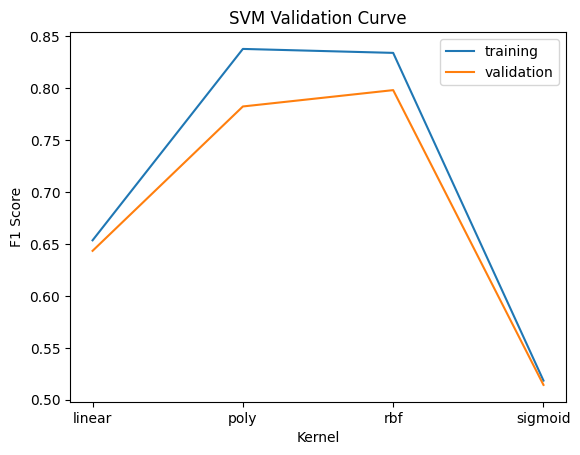

In [127]:
# SVM Validation Curve
curve_plot(param_range_svm, train_param_svm_scores, test_param_svm_scores, "SVM Validation Curve", 'Kernel','./plots/validation_curve_svm.png')

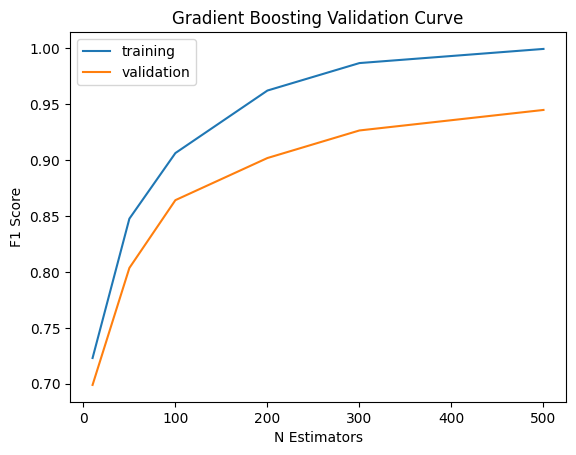

In [128]:
# Gradient Boosting Validation Curve
curve_plot(param_range_gbdt, train_param_gbdt_scores, test_param_gbdt_scores, "Gradient Boosting Validation Curve", 'N Estimators','./plots/validation_curve_gb.png')

In [154]:
# Predict Accuracy
neural_network = MLPClassifier(hidden_layer_sizes=(250, 250), activation='relu')
neural_network.fit(X_train, y_train)
y_pred_nn = neural_network.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

svm = SVC(kernel='poly',class_weight='balanced',degree=4)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

gbdt = GradientBoostingClassifier(n_estimators=200, max_depth=6)
gbdt.fit(X_train, y_train)
y_pred_gbdt = gbdt.predict(X_test)

In [155]:
nn_pred_score = f1_score(y_test, y_pred_nn)
knn_pred_score = f1_score(y_test, y_pred_knn)
svm_pred_score = f1_score(y_test, y_pred_svm)
gbdt_pred_score = f1_score(y_test, y_pred_gbdt)

print("Predicting score of neural networks: ", nn_pred_score)
print("Predicting score of KNN: ", knn_pred_score)
print("Predicting score of SVM: ", svm_pred_score)
print("Predicting score of Gradient Boosting: ", gbdt_pred_score)

Predicting score of neural networks:  0.9121621621621622
Predicting score of KNN:  0.8865248226950354
Predicting score of SVM:  0.8271186440677966
Predicting score of Gradient Boosting:  0.9527027027027027


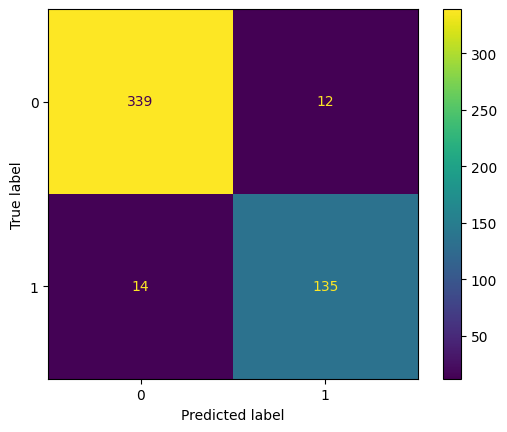

In [156]:
# Neural Network Confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn, labels=neural_network.classes_)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn,
                              display_labels=neural_network.classes_)
disp_nn.plot()

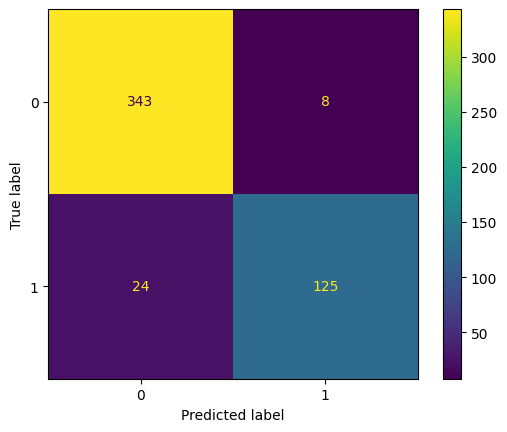

In [132]:
# KNN Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=neural_network.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=neural_network.classes_)
disp_knn.plot()

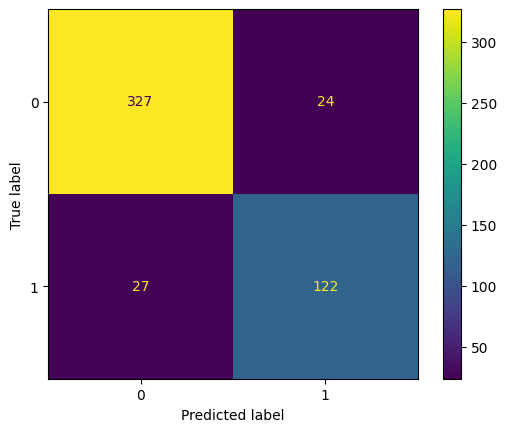

In [133]:
# SVM Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=neural_network.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=neural_network.classes_)
disp_svm.plot()

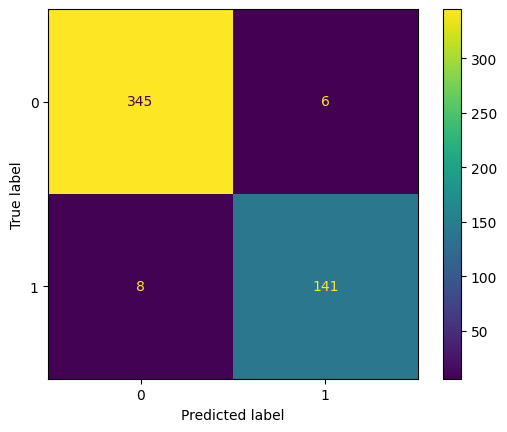

In [134]:
# Gradient Boosting Confusion matrix
cm_gbdt = confusion_matrix(y_test, y_pred_gbdt, labels=neural_network.classes_)
disp_gbdt = ConfusionMatrixDisplay(confusion_matrix=cm_gbdt,
                              display_labels=neural_network.classes_)
disp_gbdt.plot()

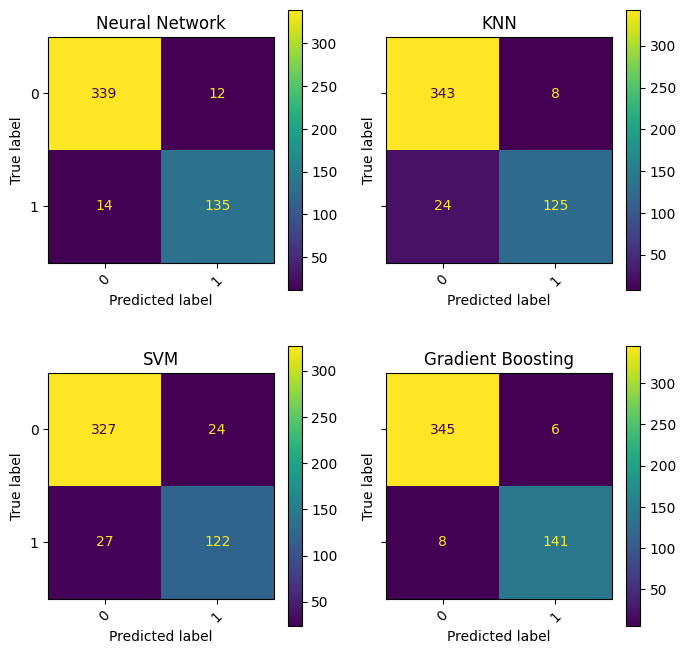

In [162]:
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharey='row')
disp_nn.plot(ax=axes[0][0], xticks_rotation=45)
disp_nn.ax_.set_title('Neural Network')
disp_knn.plot(ax=axes[0][1], xticks_rotation=45)
disp_knn.ax_.set_title('KNN')
disp_svm.plot(ax=axes[1][0], xticks_rotation=45)
disp_svm.ax_.set_title('SVM')
disp_gbdt.plot(ax=axes[1][1], xticks_rotation=45)
disp_gbdt.ax_.set_title('Gradient Boosting')
plt.savefig('./plots/confustion_matrix.png',bbox_inches='tight')